# 
<font face="华文行楷" size=10 >蒙特卡洛方法 (Monte Carlo method)</font> 
## [>](https://github.com/HUSKYzjh/ke_xue_bian_cheng)`翟家辉 19720212203881`

---------------------
________________________
<font size=6><div align='center'> **------------------------目录------------------------**</div></font>


## &#x2705; 壹 · Logistic Map直方图
 
## &#x2705; 贰 · 模拟掷骰子

## &#x2705; 叁 · FFT分析

## &#x2705; 肆 · 致谢



---------
--------
# 一 · Logistic Map直方图

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from matplotlib.widgets import SpanSelector
import matplotlib.gridspec as gridspec
plt.rcParams['font.sans-serif'] = ['SimHei']  # 显示中文
plt.rcParams['axes.unicode_minus'] = False  # 显示负号

def main(r,x0,N,hhh):#,dhys,pre
#     pre=pre/100
#     if dhys=="r":
#         r=r*pre
#     elif dhys=="x0":
#         x0=x0*pre
#     elif dhys=="N":
#         N=int(N*pre)
    x=np.linspace(0,N,N+1)
    y=[x0]
    plt.figure(figsize=(15,10))
    for i in range(0,N):
        s=r*y[i]*(1-y[i])
        y.append(s)
    gs = gridspec.GridSpec(7,5)
    t1=plt.subplot(gs[0:2,:])
    t2=plt.subplot(gs[3:,:])
    t1.plot(x,y,color="g",linewidth=0.5)
    t1.set_xlabel("迭代次数",size=20)
    t1.set_ylabel("$X_n$",size=20)
    t1.set_title("$X_n$时间序列",size=20)
    
    
    bn=int(3.3*np.log(len(y))+1)
    t2.grid(linestyle='-.')
    
    n, bins,patches=t2.hist(y,bn,(0,1),density=(hhh=="频率分布直方图"),edgecolor="black")
    t2.plot(x-x+x0,x)
    t2.set_ylim(0,max(n)*1.1)
    t2.set_title(hhh+f"——组数{len(n)}",size=20)
    print(f"z",bn)
    t2.set_xlabel("$X_n$取值",size=20)
    t2.set_ylabel("频数(率)/组距",size=20)
    for i in range(len(n)):
        t2.text(bins[i], n[i]*1.02, int(n[i]*1000)/1000, fontsize=250/len(n), horizontalalignment="center") #打标签，在合适的位置标注每个直方图上面样本数
    if r==4 and hhh=='频率分布直方图':
        xx=np.linspace(0,1,N*100)
        yy=1/(np.pi*np.sqrt(xx[1:-2]*(1-xx[1:-2])))
        t2.plot(xx[1:-2],yy,color='m',linewidth=2)
    plt.show()
    
widgets.interact(
    main,
    x0=widgets.FloatSlider(min=0, max=1, step=0.001, value=0.8, readout_format='.4f',description='x0(初值):'),
    r=widgets.FloatSlider(min=0, max=4, step=0.001, value=4, readout_format='.4f',description='r(参数):'),
    N=widgets.IntSlider(min=10, max=10000, step=100, value=100,description='n(迭代次数):'),
    hhh=widgets.RadioButtons(options=['频率分布直方图','频数分布直方图'],description='演化图类型:',disabled=False),
#     dhys=widgets.RadioButtons(options=['r','x0','N'],description='动画演示:',disabled=False),
#     pre = widgets.Play(value=0,min=0,max=100,step=1,sleep=10,description="Press play",disabled=False)
)

interactive(children=(FloatSlider(value=4.0, description='r(参数):', max=4.0, readout_format='.4f', step=0.001),…

<function __main__.main(r, x0, N, hhh)>

># 例图
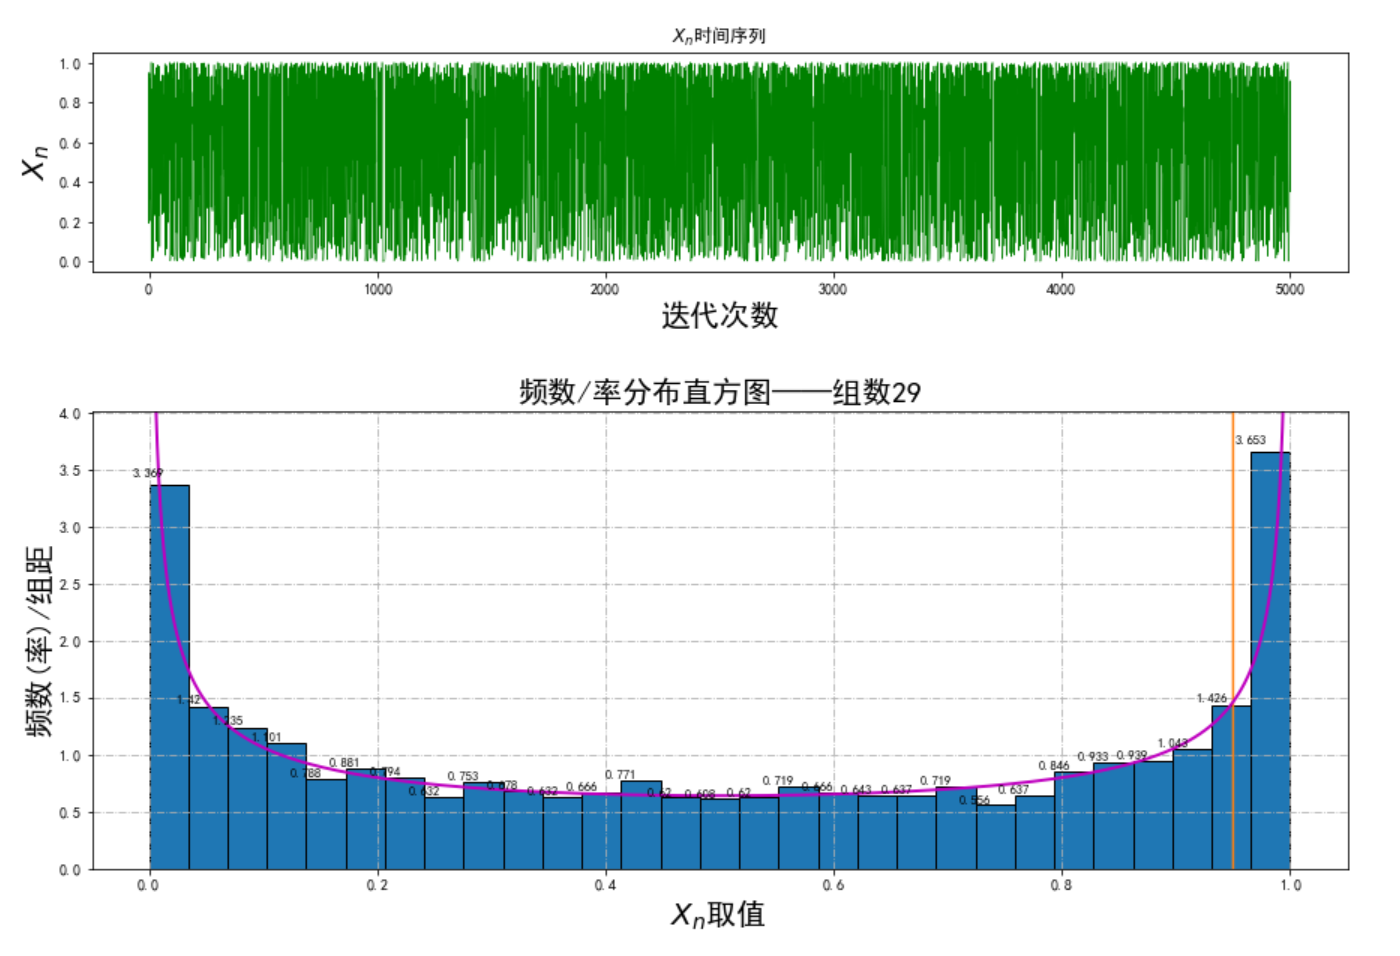

---------
--------
# 二 · 模拟掷骰子 

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from matplotlib.widgets import SpanSelector
import matplotlib.gridspec as gridspec
import random
plt.rcParams['font.sans-serif'] = ['SimHei']  # 显示中文
plt.rcParams['axes.unicode_minus'] = False  # 显示负号


def zhi(m,N,hhh):
    random.seed()
    x=[]
    plt.figure(figsize=(15,9))
    gs = gridspec.GridSpec(7,5)
    t1=plt.subplot(gs[0:2,:])
    t2=plt.subplot(gs[3:,:])
    for i in range(1,N+1):
        x.append(random.randint(1,m))
    t1.scatter(range(1,N+1),x,c="g")
    t1.set_xlabel("投掷次数",size=20)
    t1.set_ylabel("点数",size=20)
    t1.set_title("时间序列",size=15)
    #print(x)
    t2.grid(linestyle='-.')
    mm=np.linspace(1,m+1,m+1)
    
    n,bins,patches=t2.hist(x,mm,density=(hhh=="频率分布直方图"),edgecolor="black",align='left',rwidth=0.5)
    t2.set_ylim(0,max(n)*1.3)
    t2.set_title(hhh+f"——组数为{len(n)}",size=15)
    t2.set_xlabel("点数",size=20)
    t2.set_ylabel("频数(率)/组距",size=20)
    for i in range(len(n)):
        t2.text(bins[i], n[i]*1.02, int(n[i]*1000)/1000, fontsize=120/len(n), horizontalalignment="center")
    xn=np.linspace(0,m+1,1000)
    if hhh=="频率分布直方图":
        t2.plot(xn,1/m-xn+xn)
    elif hhh=="频数分布直方图":
        t2.plot(xn,N/m-xn+xn)
    
    
    
widgets.interact(
    zhi,
    m=widgets.IntSlider(min=2, max=50, step=1, value=6,description='骰子面数:'),
    N=widgets.IntSlider(min=1, max=10000, step=10, value=100,description='n(投掷次数):'),
    hhh=widgets.RadioButtons(options=['频率分布直方图','频数分布直方图'],description='演化图类型:',disabled=False),
)

interactive(children=(IntSlider(value=6, description='骰子面数:', max=50, min=2), IntSlider(value=100, description…

<function __main__.zhi(m, N, hhh)>

># 例图
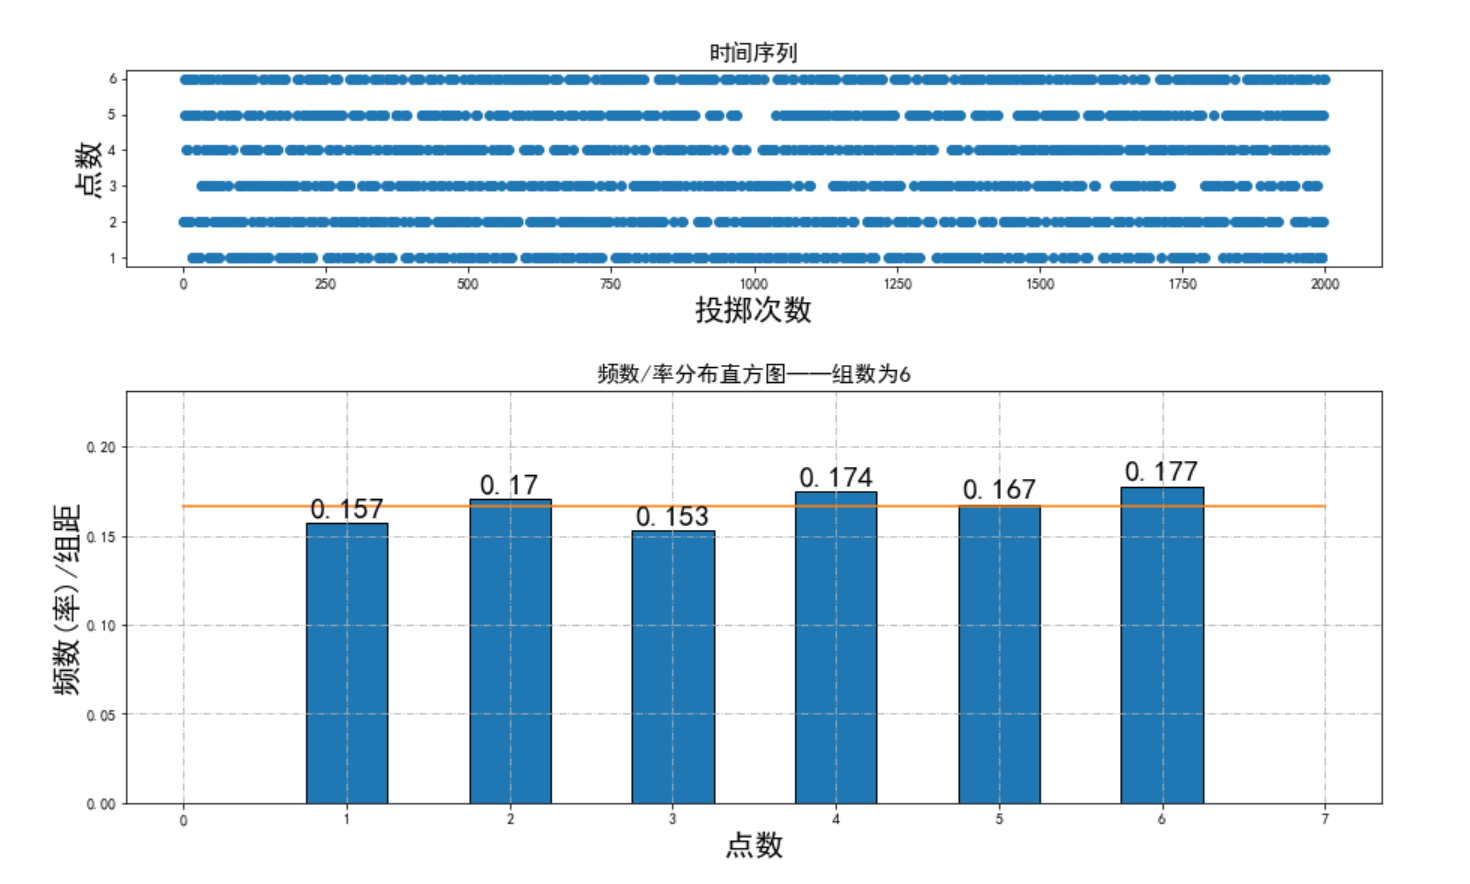

---------
--------
# 三 · FFT分析

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from matplotlib.widgets import SpanSelector
import matplotlib.gridspec as gridspec
import random
from scipy.fftpack import fft
plt.rcParams['font.sans-serif'] = ['SimHei']  # 显示中文
plt.rcParams['axes.unicode_minus'] = False  # 显示负号

##  `功率谱`

In [4]:
# 功率谱
def FFT(x):
    A=np.fft.rfft(x)
    A_amp=np.abs(A)
    A_p=A_amp**2
    return A_p

def main(x0,N,r,m,固定随机数种子和X0,去除第一项):
    
    if 固定随机数种子和X0 is True:
        random.seed(x0)
    else: 
        random.seed()
        x0=random.random()
    x=[]
    
    for i in range(1,N+1):
        x.append(random.randint(1,m)/m)
        
    r=4.0
    x00=np.linspace(0,N,N+1)
    y=[x0]
    plt.figure(figsize=(15,10))
    for i in range(0,N):
        s=r*y[i]*(1-y[i])
        y.append(s)    

    X=FFT(x)
    Y=FFT(y)
    nn=range(len(X))
    if 去除第一项 is True:
        plt.plot(nn[1:],X[1:],alpha=0.5,c="b",label=f"掷骰子")
        plt.plot(nn[1:],Y[1:],alpha=0.5,c="r",label=f"LM")
    else:
        plt.plot(nn,X,alpha=0.5,c="b",label=f"掷骰子")
        plt.plot(nn,Y,alpha=0.5,c="r",label=f"LM")
    
    plt.legend(loc='upper right',fontsize=20)
    plt.xlabel("功率")
    plt.ylabel("值")
    plt.title("功率谱",size=15)
    
widgets.interact(
    main,
    m=widgets.IntSlider(min=2, max=50, step=1, value=6,description='骰子面数:'),
    N=widgets.IntSlider(min=30, max=10000, step=10, value=500,description='投掷/迭代数:'),
    x0=widgets.FloatSlider(min=0, max=1, step=0.001, value=0.8, readout_format='.4f',description='x0(初值):'),
    r=widgets.FloatSlider(min=0, max=4, step=0.001, value=4, readout_format='.4f',description='r(参数):'),
    固定随机数种子和X0=True,
    去除第一项=False
)

interactive(children=(FloatSlider(value=0.8, description='x0(初值):', max=1.0, readout_format='.4f', step=0.001)…

<function __main__.main(x0, N, r, m, 固定随机数种子和X0, 去除第一项)>

##  `主要频率分析`
### 据上述所得求功率谱除0处的极差，并将低于其一半的功率值赋为零。为便于比较，将M面骰子的时间序列值同除M，限制其取值为 (0,1] 之间.

In [6]:
# 主频分析

def main(x0,N,r,m,yz,固定随机数种子和X0):
    
    if 固定随机数种子和X0 is True:
        random.seed(x0)
    else: 
        random.seed()
        x0=random.random()
    x=[]
    for i in range(1,N+1):
        x.append(random.randint(1,m)/m)
    r=4.0
    x00=np.linspace(0,N,N+1)
    
    y=[x0]
    plt.figure(figsize=(15,10))
    for i in range(0,N):
        s=r*y[i]*(1-y[i])
        y.append(s)    
    
    
    def FFT(x):
        A=np.fft.rfft(x)
        A_amp=np.abs(A)
        A_p=A_amp**2
        return A_p

    X=FFT(x)
    Y=FFT(y)
    xm=max(X[1:])
    ym=max(Y[1:])
    
    y1=x1=len(X)-1
    nx=ny=len(X)-1
    
    nn=range(len(X)-1)
    for i in range(len(X)):
        if X[i]<(xm*yz):
            X[i]=0
            nx-=1
        if Y[i]<(ym*yz):
            Y[i]=0 
            ny-=1
        #print(Y[i])
    
    plt.plot(nn,X[1:],alpha=0.5,c="b",label=f"掷骰子 - - {nx}")
    plt.plot(nn,Y[1:],alpha=0.5,c="r",label=f"LM - - {ny}")
    plt.plot(nn,X[1:]-X[1:]+xm*yz,"c",label=f"掷骰子阙值")
    plt.plot(nn,X[1:]-X[1:]+ym*yz,"m",label=f"LM阙值")
    
    plt.legend(loc='upper right',fontsize=20)
    plt.xlabel("功率")
    plt.ylabel("值")
    plt.title(f"主要频率分析,阈值为{yz},相应功率数见图例",size=15)
    
widgets.interact(
    main,
    m=widgets.IntSlider(min=2, max=50, step=1, value=6,description='骰子面数:'),
    N=widgets.IntSlider(min=30, max=10000, step=10, value=1000,description='投掷/迭代数:'),
    x0=widgets.FloatSlider(min=0, max=1, step=0.001, value=0.8, readout_format='.4f',description='x0(初值):'),
    r=widgets.FloatSlider(min=0, max=4, step=0.001, value=4, readout_format='.4f',description='r(参数):'),
    yz=widgets.FloatSlider(min=0.0001, max=1, step=0.0001, value=0.5, readout_format='.4f',description='阈值:'),
    固定随机数种子和X0=True
)

interactive(children=(FloatSlider(value=0.8, description='x0(初值):', max=1.0, readout_format='.4f', step=0.001)…

<function __main__.main(x0, N, r, m, yz, 固定随机数种子和X0)>

##  在不固定随机数种子而移动阙值时，我们观察到LM阙值的波动程度显著强于掷骰子过程，一定程度上说明其过程中随机性更强。

---------
--------
# 四 · 致谢

## 鸣谢&#x1F339;&#x1F339;&#x1F339;：互联网及其共享生态，和还没有入门的统计学。

>## 另：已将各次作业上传至[GitHub](https://github.com/HUSKYzjh/ke_xue_bian_cheng)